---

 ## **Data Cleansing of New York City Airbnb Dataset**
 
 ### By Jayapriya Sreenivasan

---

#### **Introduction**

Since 2008, Airbnb has offered guests and hosts a personalized way to experience travel. This dataset captures Airbnb listings in NYC for 2019, focusing on cleaning processes to ensure data accuracy and reliability. Key tasks include ensuring data integrity, handling missing values, removing duplicate records, standardizing formats for consistency, and detecting outliers to prevent skewed analysis, resulting in a refined and ready-to-use dataset.


#### **About the Dataset**

The dataset provides detailed information about Airbnb listings in New York City for 2019. Includes over 48,000 entries across NYC's five boroughs: Manhattan, Brooklyn, Queens, Bronx, and Staten Island.

**Key metrics:**

+ **Price** of the listing
+ **Availability** throughout the year (availability in 365 days)
+ **Neighborhood** location of each listing
+ **Host details** including host name and number of listings per host
+ **Number of reviews** and reviews per month for each listing
+ **Room types** (Entire home/apt, Private room, Shared room)

#### **Business Task**

The goal is to clean and prepare the Airbnb NYC 2019 dataset for analysis. This data will provide reliable insights into pricing trends, neighborhood demand, and host activity across New York City.

#### **Objective**

The objective of this project is to clean and preprocess the Airbnb NYC 2019 dataset to ensure it is accurate, consistent, and ready for analysis. This involves addressing missing data, removing duplicates, standardizing data formats, and detecting outliers. The cleaned dataset will enable reliable insights into pricing strategies, neighborhood preferences, and host behaviors in New York City.

#### **Data sources**

This dataset provided from [New York City Airbnb Open Dataset](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data) The dataset used in this project is publicly available and can be accessed from the Airbnb New York City listings for 2019.

#### **Limitations**

+ Missing Data: Significant gaps in reviews_per_month and last_review (20% missing).
+ Outliers: Extreme values in price and minimum_nights may skew analysis.
+ Single Year Data: Only covers 2019, limiting trend analysis over time.
+ No Guest or Revenue Data: Lacks guest demographics and direct revenue information.
+ Incomplete Location Info: Some listings have missing or incomplete neighborhood details.

--------


# __*Process*__

##### **Tools Used to process data:**

I used Visual Studio Code for running Python scripts for the data cleansing process.

##### **Steps involved in the Process**

+ Data Loading: Importing the Airbnb NYC 2019 dataset.
+ Data Integrity Check: Verifying column data types, checking for inconsistencies, and removing junk characters.
+ Missing Data Handling: Identifying missing values and filling them with appropriate substitutes (e.g., 0 for reviews_per_month, placeholders for last_review and host_name).
+ Duplicate Removal: Checking and removing any duplicate rows.
+ Data Standardization: Converting text fields to lowercase and trimming extra spaces to ensure consistency.
+ Outlier Detection: Using boxplots and the IQR method to detect and remove outliers in numerical columns like price and minimum_nights.
+ Final Cleaned Data: Saving the cleaned dataset for analysis and modeling.

In [96]:
# Import necessary libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [97]:
# Load the dataset

nyc_abnb_data = pd.read_csv(r'C:\Users\chanv\OIBSIP\oibsip_task3\AB_NYC_2019.csv')

In [98]:
# Display the first few rows of the dataset

print("\nDataset Overview:\n")
print(nyc_abnb_data.head())


Dataset Overview:

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1   

1. Data Integrity:

In [99]:
 # Checking the Info and the data types of the dataset:

nyc_abnb_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [100]:
# Check for inconsistencies, errors, and data corruption.

for column in ['neighbourhood_group', 'room_type']:
    print(f"Unique values in {column}: {nyc_abnb_data[column].unique()}")

Unique values in neighbourhood_group: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique values in room_type: ['Private room' 'Entire home/apt' 'Shared room']


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         john            Brooklyn    Kensington  40.64749  -73.97237   
1     jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  lisaroxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

2. Missing Data Handling:

In [102]:
# Identify missing values and decide whether to fill them or remove rows/columns:

nyc_missing_data = nyc_abnb_data.isnull().sum()
print("\nMissing data in each column:\n")
nyc_missing_data


Missing data in each column:



id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [103]:
# Calculate percentage of missing data

missing_percentage = (nyc_abnb_data.isnull().sum() / len(nyc_abnb_data)) * 100
print(missing_percentage)

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64


In [104]:
# Filling missing values

nyc_abnb_data['reviews_per_month'].fillna(0, inplace=True)        # replacing missing reviews per month to 0
nyc_abnb_data['last_review'].fillna('No Review', inplace=True)    # replacing missing reviews'No Review'
nyc_abnb_data['host_name'].fillna('Unknown', inplace=True)        # replacing missing host name to 'Unknown'
nyc_abnb_data['name'].fillna('Unnamed', inplace=True)             # replacing missing name to 'Unnamed'

In [105]:
# Check again for remaining missing values

missing_nyc_data2 = nyc_abnb_data.isnull().sum()
print("Missing data after filling:\n")
missing_nyc_data2

Missing data after filling:



id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

3. Duplicate Removal:

In [106]:
# Checking and removing duplicate records:

duplicates = nyc_abnb_data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
data_cleaned = nyc_abnb_data.drop_duplicates()

Number of duplicate rows: 0


4. Standardization:

In [114]:
# Ensuring consistent formatting on text (categorical) columns for accurate analysis:



# Function to remove junk characters from a string:

def clean_text(text):
    if isinstance(text, str):
        text = text.lower() # Convert to lowercase for consistency
        text = text.strip() # Remove any extra spaces at the beginning or end
        text = re.sub(r'[^\x00-\x7F]+', '', text) # Remove non-ASCII characters (optional)

        # Remove junk characters while retaining non-ASCII (foreign language) text
        text = re.sub(r'[^A-Za-z0-9\s\.\,\!\?\@\#\$\%\&\*\(\)\-\_\+\=\:\;\x80-\uFFFF]', '', text)

    return text

character_columns = ['host_name', 'room_type', 'neighbourhood_group', 'neighbourhood', 'name']

# Apply the clean_text function to all text-based columns
for column in character_columns:
    nyc_abnb_data[column] = nyc_abnb_data[column].apply(clean_text)
 #   print(nyc_abnb_data.head())


nyc_abnb_data.to_csv('cleaned_AB_NYC_2019.csv', index=False)


5. Outlier Detection: 

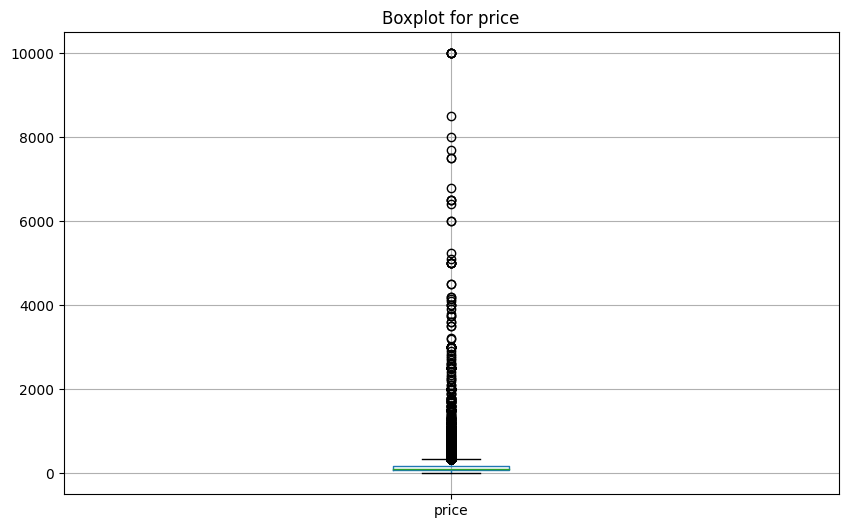

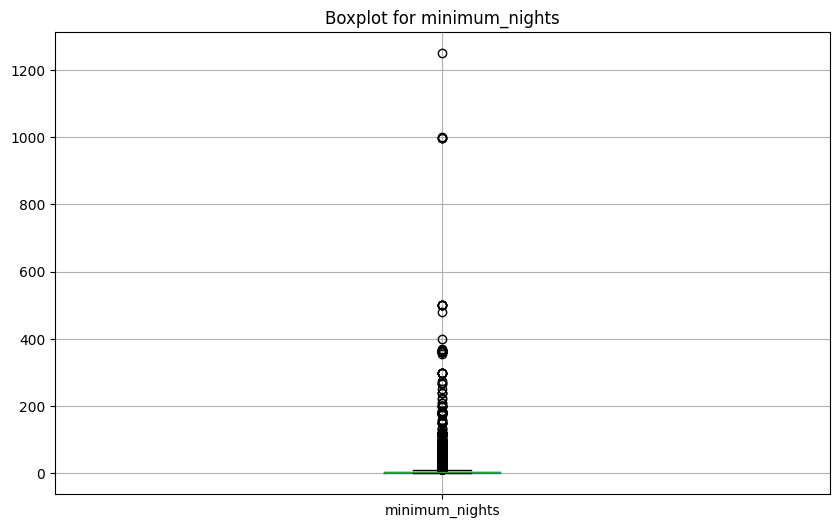

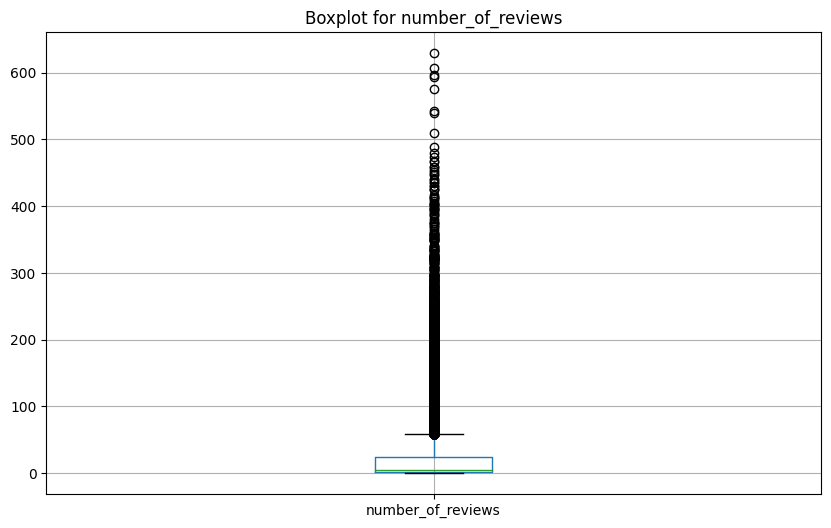

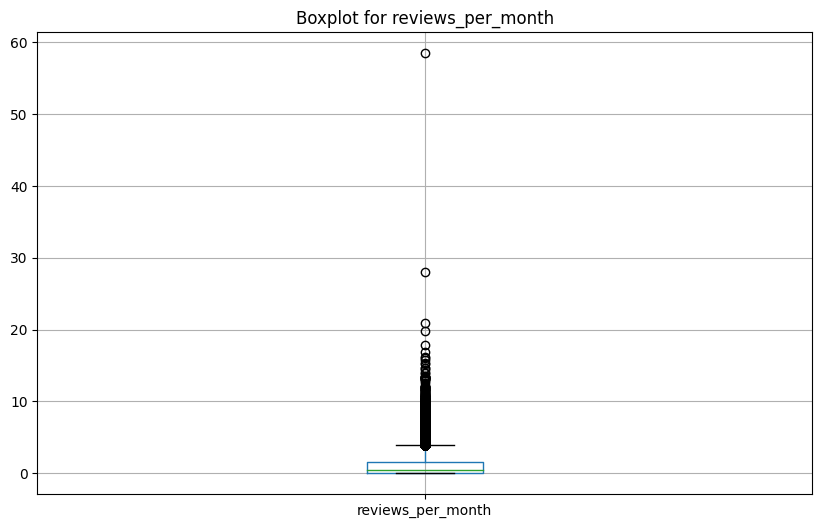

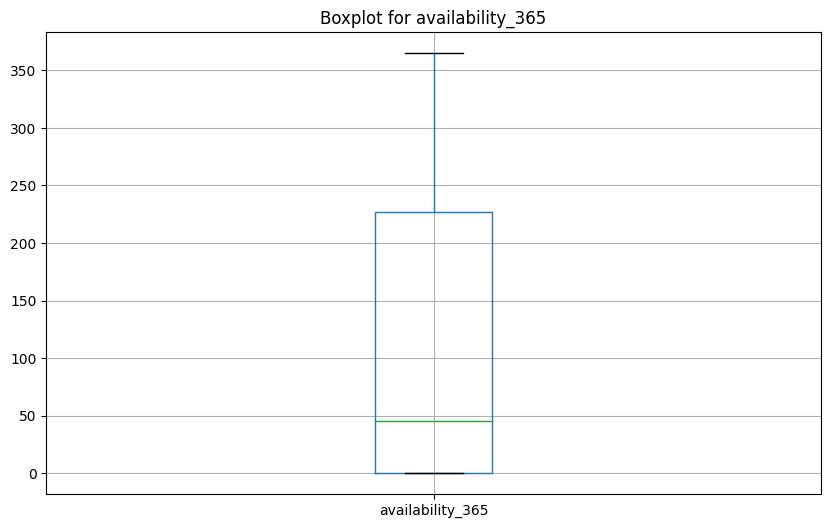

In [108]:
# Outlier Detection: Analyze numerical data to find and handle any outliers

numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

for col in numerical_columns:
    plt.figure(figsize = (10, 6))
    nyc_abnb_data.boxplot(column = col)
    plt.title(f'Boxplot for {col}')
    plt.show()

**Inference:**

+ Price: Significant outliers likely represent luxury or extremely low-priced properties, which could skew pricing analysis.
+ Minimum Nights: Outliers likely show unusually high minimum stays, impacting average stay duration.
+ Number of Reviews: Listings with very high review counts are outliers, indicating highly popular listings.
+ Reviews per Month: Outliers show listings with consistently high review activity, distorting review metrics.
+ Availability 365: Outliers with 0 or 365 days of availability may indicate special cases or inconsistencies in data.

These outliers should be handled to ensure accurate analysis.

In [112]:
# Remove outliers using quantiles

Q1 = nyc_abnb_data[numerical_columns].quantile(0.25)
Q3 = nyc_abnb_data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((nyc_abnb_data[numerical_columns] < (Q1 - 1.5 * IQR)) | (nyc_abnb_data[numerical_columns] > (Q3 + 1.5 * IQR)))
outliers.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,True,True,False
4,False,False,False,False,False


In [116]:
# Drop rows with outliers

data_cleaned = nyc_abnb_data[~outliers.any(axis=1)]
data_cleaned = data_cleaned.reset_index(drop=True)
data_cleaned

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean & quiet apt home by the park,2787,john,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit midtown castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire homeapt,225,1,45,2019-05-21,0.38,2,355
2,3647,the village of harlem....new york !,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,No Review,0.00,1,365
3,5022,entire apt: spacious studioloft by central park,7192,laura,manhattan,east harlem,40.79851,-73.94399,entire homeapt,80,10,9,2018-11-19,0.10,1,0
4,5295,beautiful 1br on upper west side,7702,lena,manhattan,upper west side,40.80316,-73.96545,entire homeapt,135,5,53,2019-06-22,0.43,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32480,36484665,charming one bedroom - newly renovated rowhouse,8232441,sabrina,brooklyn,bedford-stuyvesant,40.67853,-73.94995,private room,70,2,0,No Review,0.00,2,9
32481,36485057,affordable room in bushwickeast williamsburg,6570630,marisol,brooklyn,bushwick,40.70184,-73.93317,private room,40,4,0,No Review,0.00,2,36
32482,36485431,sunny studio at historical neighborhood,23492952,ilgar & aysel,manhattan,harlem,40.81475,-73.94867,entire homeapt,115,10,0,No Review,0.00,1,27
32483,36485609,43rd st. time square-cozy single bed,30985759,taz,manhattan,hells kitchen,40.75751,-73.99112,shared room,55,1,0,No Review,0.00,6,2


**Inference:**

* The dataset size was reduced from 48,895 to 32,485 rows, resulting in the removal of 16,410 rows due to extreme outliers.
* This significant reduction indicates that a large number of listings had extreme values in numerical columns such as price, minimum nights, and reviews.

---------------
Here are the key findings:

1. **Data Integrity:**

    + Text Standardization:
        * The columns (host_name, room_type, neighbourhood_group, neighbourhood, name) were standardized by converting to lowercase, removing extra spaces, and eliminating junk characters.
        * Aforementioned columns were cleaned for consistency.

2. **Missing Data Handling:**

    + Total rows before cleaning: 48,895
    + Rows after handling missing data and outliers: 32,485
    + Missing Data Imputation:
        * reviews_per_month: Missing values (20.56%) were replaced with 0.
        * last_review: Missing values (20.56%) were replaced with 'No Review'.
        * host_name: Missing values (0.04%) were filled with 'Unknown'.
        * name: Missing values (0.03%) were replaced with 'Unnamed'.
        * Remaining Missing Values: After filling, no missing values remained in the critical columns.

3. **Duplicate Removal:**

    + Number of duplicate rows: None were found.

4. Outlier Detection:

    + Boxplots were used to detect outliers in numerical columns.
    + Outliers removed: After applying the IQR method, the dataset was reduced from 48,895 to 32,485 rows, indicating the removal of 16,410 rows due to extreme outliers.

5. Final Dataset:

    + Final dataset size: 32,485 rows and 16 columns after handling missing data, duplicate removal, and outliers.

__**Key Observations:**__
+ Outlier removal resulted in a significant reduction in dataset size, suggesting that a large number of listings had extreme values in numerical columns.
+ The dataset is now clean, standardized, and ready for further analysis, with no missing data or duplicates.

-------------